In [1]:
from bunkatech.networks.network_class import SemanticNetwork
import pandas as pd
import networkx as nx

data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

data = data[['imdb', 'genre', 'country']].copy().dropna()
data['genre'] = data['genre'].apply(lambda x: x.split(', '))
data['country'] = data['country'].apply(lambda x: x.split(', '))
data = data.explode('genre')
data = data.explode('country')


In [7]:
net = SemanticNetwork(data, variables = ['country'], key = 'imdb')

In [16]:
fig = net.pipeline(top_n=100,
                    global_filter=0.1,
                    n_neighbours=10,
                    method="node2vec",
                    n_cluster=5,
                    bin_number=30,
                    black_hole_force=3,
                    color="community",
                    size="size",
                    symbol="entity",
                    textfont_size=9,
                    edge_size=1,
                    height=1000,
                    width=1000,
                    template="plotly_dark")

Computing transition probabilities:   0%|          | 0/21 [00:00<?, ?it/s]


Generating walks (CPU: 8): 100%|██████████| 1/1 [00:00<00:00, 149.76it/s]

Computing transition probabilities:   0%|          | 0/23 [00:00<?, ?it/s]


Generating walks (CPU: 8): 100%|██████████| 1/1 [00:00<00:00, 108.85it/s]

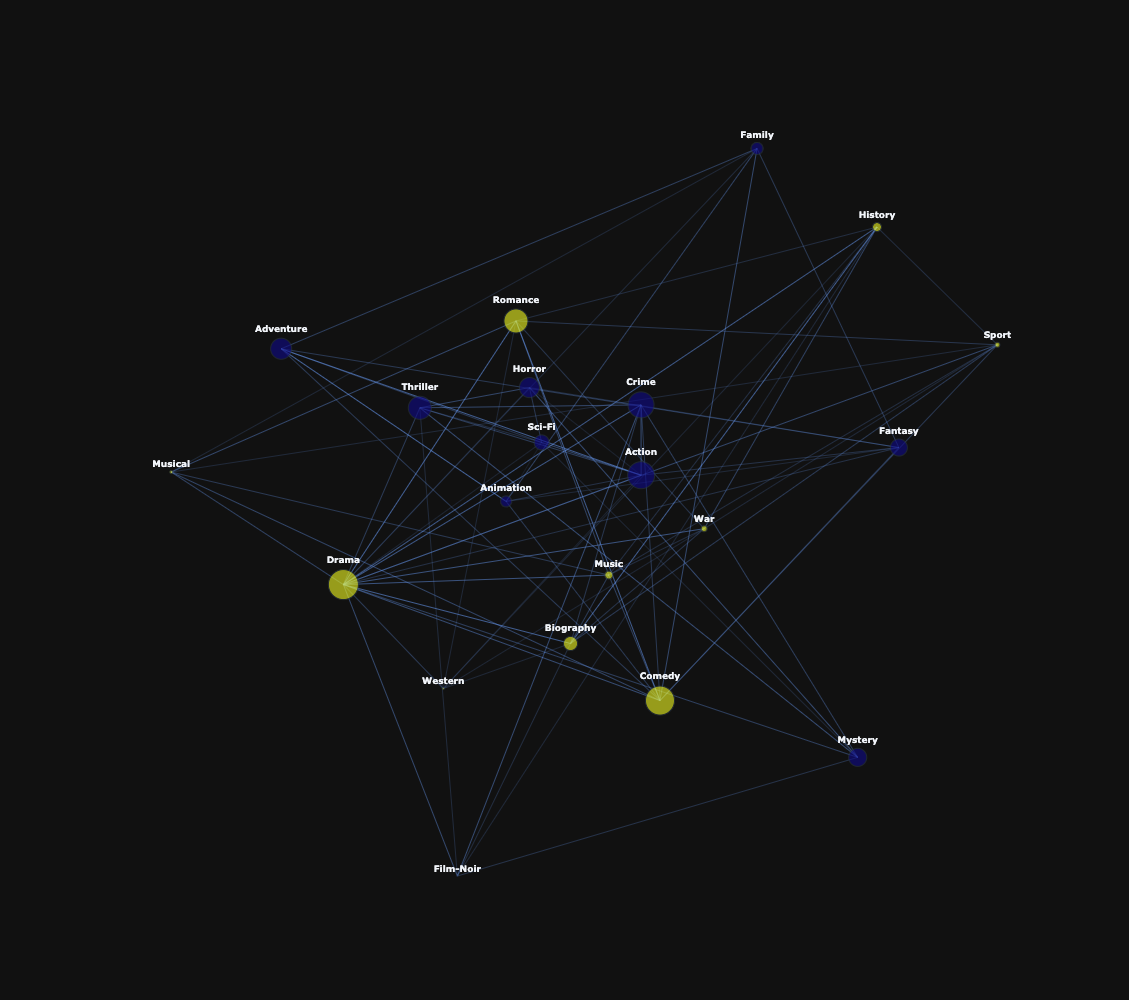

In [17]:
fig.show()

In [6]:
net.df_node

,0,1,centrality,community,entity,size
Action,-3.203862,-1.159245,29.0,1,1,30
USA,-2.739341,-2.364487,30.0,1,0,30
Adventure,-2.830848,0.158641,29.0,1,1,28
Crime,-4.828079,-4.673138,28.0,5,1,29
China,-6.835649,1.657612,15.0,9,0,22
...,...,...,...,...,...,...
network_center_5,-6.434970,-3.541419,NaN,5,centroid,1
network_center_6,-0.055485,4.143098,NaN,6,centroid,1
network_center_7,6.095755,-3.428873,NaN,7,centroid,1
network_center_8,1.897201,-6.759901,NaN,8,centroid,1
